# Figures for ConsensusCruncher manuscript
<a href='#section.fig4'> Fig 4. mutation calling and quantification </a><br>
<a href='#section.fig5'> Fig 5. Copy number calling and quantification on LargeMid </a><br>
<a href='#section.fig6'> Fig 6. Copy number calling and quantification on HPV-SiHa </a><br>
<a href='#section.fig7b'> Fig 7B. Structural variation calling and quantification on MYLESTONE2 </a><br>
<a href='#section.fig5a'> Fig 5A. Segment value distribution for MOLM13 and SW48 </a><br>

In [3]:
data_dir = "path"

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.lines import Line2D

 <a id='section.fig4'> Fig 4. mutation calling and quantificagtion </a>

### Fig 4A. LargeMid

In [4]:
## Load data
os.chdir(data_dir)
df = pd.read_csv('Fig4A_LargeMid_mutation_profile.txt', sep='\t')
df.head(2)

,chr,start,ref,alt,FREQ,depth,Sample,pos,pre_type,bamtype,dilution,level,homo_heter,normalized_vaf,level_float
0,1,16242620,C,A,42.75,1630,SWID_4627089_EPICT_056,1_16242620,Manual,uncollapsed,56,100%,heter,0.855,100.0
1,1,16255644,C,T,45.60,2194,SWID_4627089_EPICT_056,1_16255644,Manual,uncollapsed,56,100%,heter,0.912,100.0


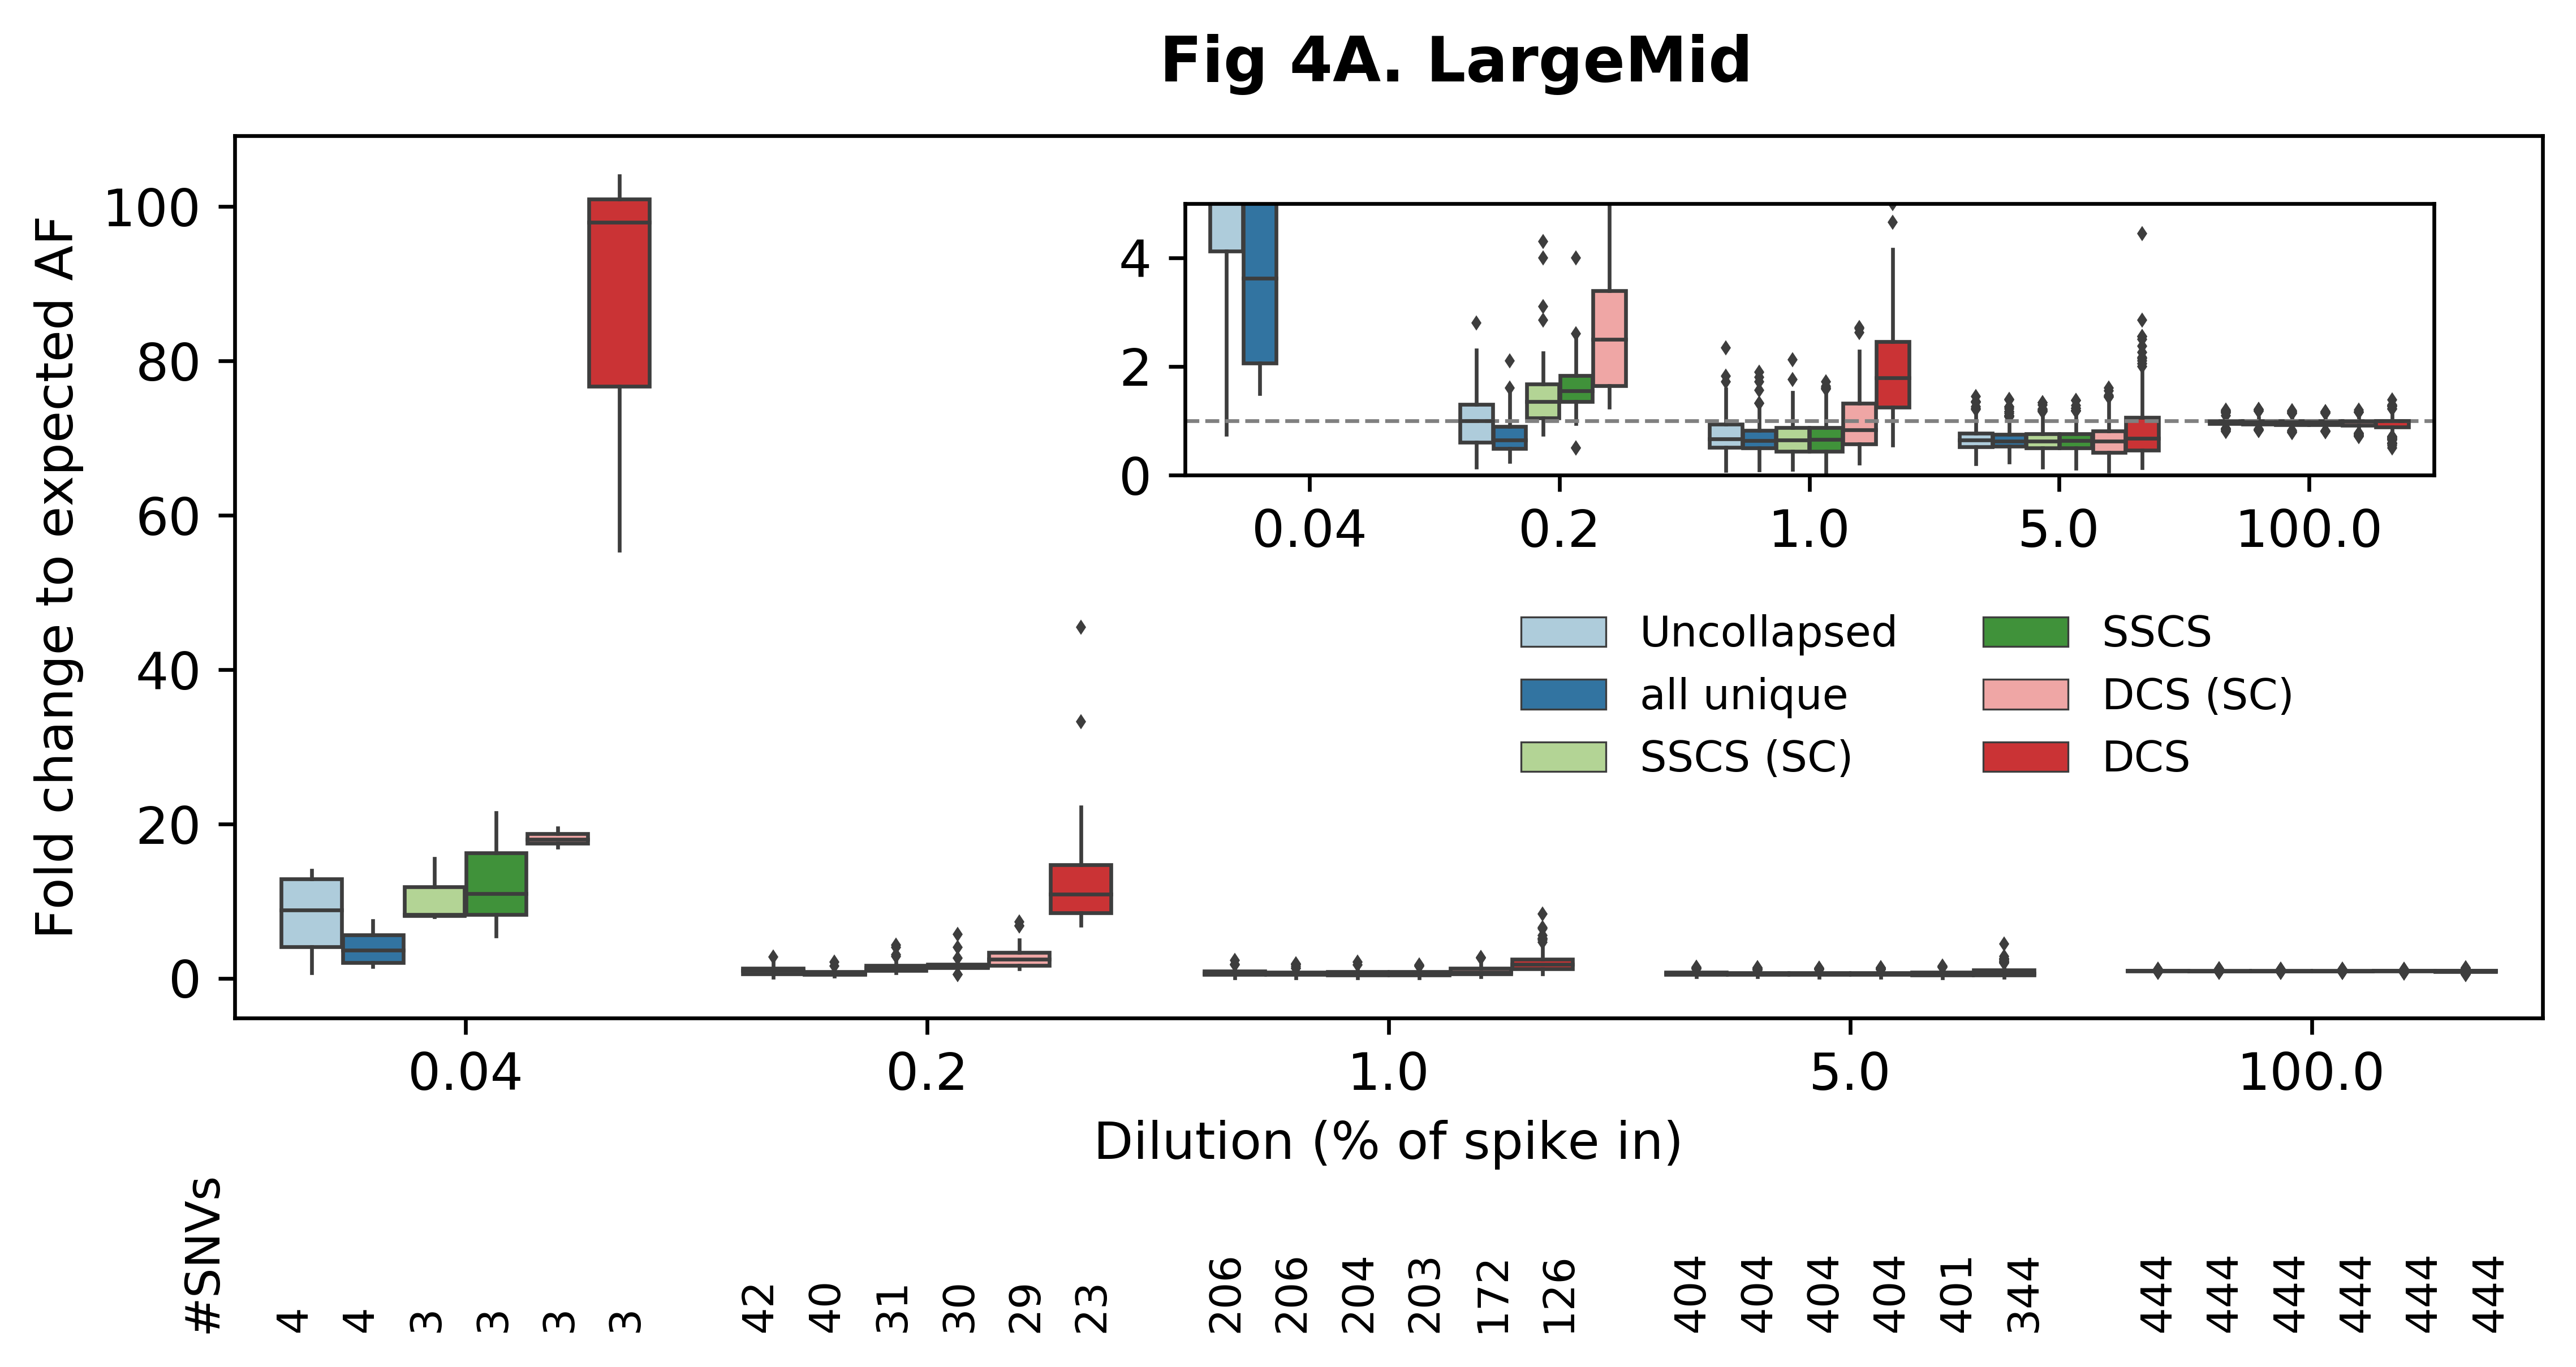

In [7]:
bamtypes = ['uncollapsed', 'all.unique.dcs', 'sscs_sr', 'sscs', 'dcs_sr', 'dcs']

value_type = "normalized_vaf"
legend_loc = (0.55, 0.25)
addplot = True
addplot_loc = [0.4, 0.72, 0.46, 0.16]

ylimit = [0, 5]
yhline = 1

pt_nSNV = 0.02445 # For showing #SNV
pt_shift = 50 # regulating the space
suptitle = 'Fig 4A. LargeMid'
compare_VAF_boxplot(df, bamtypes, suptitle, value_type, legend_loc, addplot, 
                         addplot_loc, ylimit, yhline, pt_nSNV, pt_shift)


### MYLESTONE2

In [8]:
os.chdir(data_dir)
file = "Fig4_MYLESTONE2_mutation_profile.txt"
df = pd.read_csv(file, sep='\t')
df.head(2)

,Sample,bamtype,chr,pos,ref,alt,Filter,depth,ref_count,alt_count,FREQ,cell,fmt,homo_heter,Dilution_level,level,normalized_vaf
0,KMS11-1,all.unique.dcs,chr8,128427720,C,T,PASS,8047,6949,1094,13.60,KMS11,KMS11_8_128427720_C_T,homo,0.1,10%,1.360
1,KMS11-1,all.unique.dcs,chr8,128428061,A,G,PASS,5649,4914,733,12.98,KMS11,KMS11_8_128428061_A_G,homo,0.1,10%,1.298


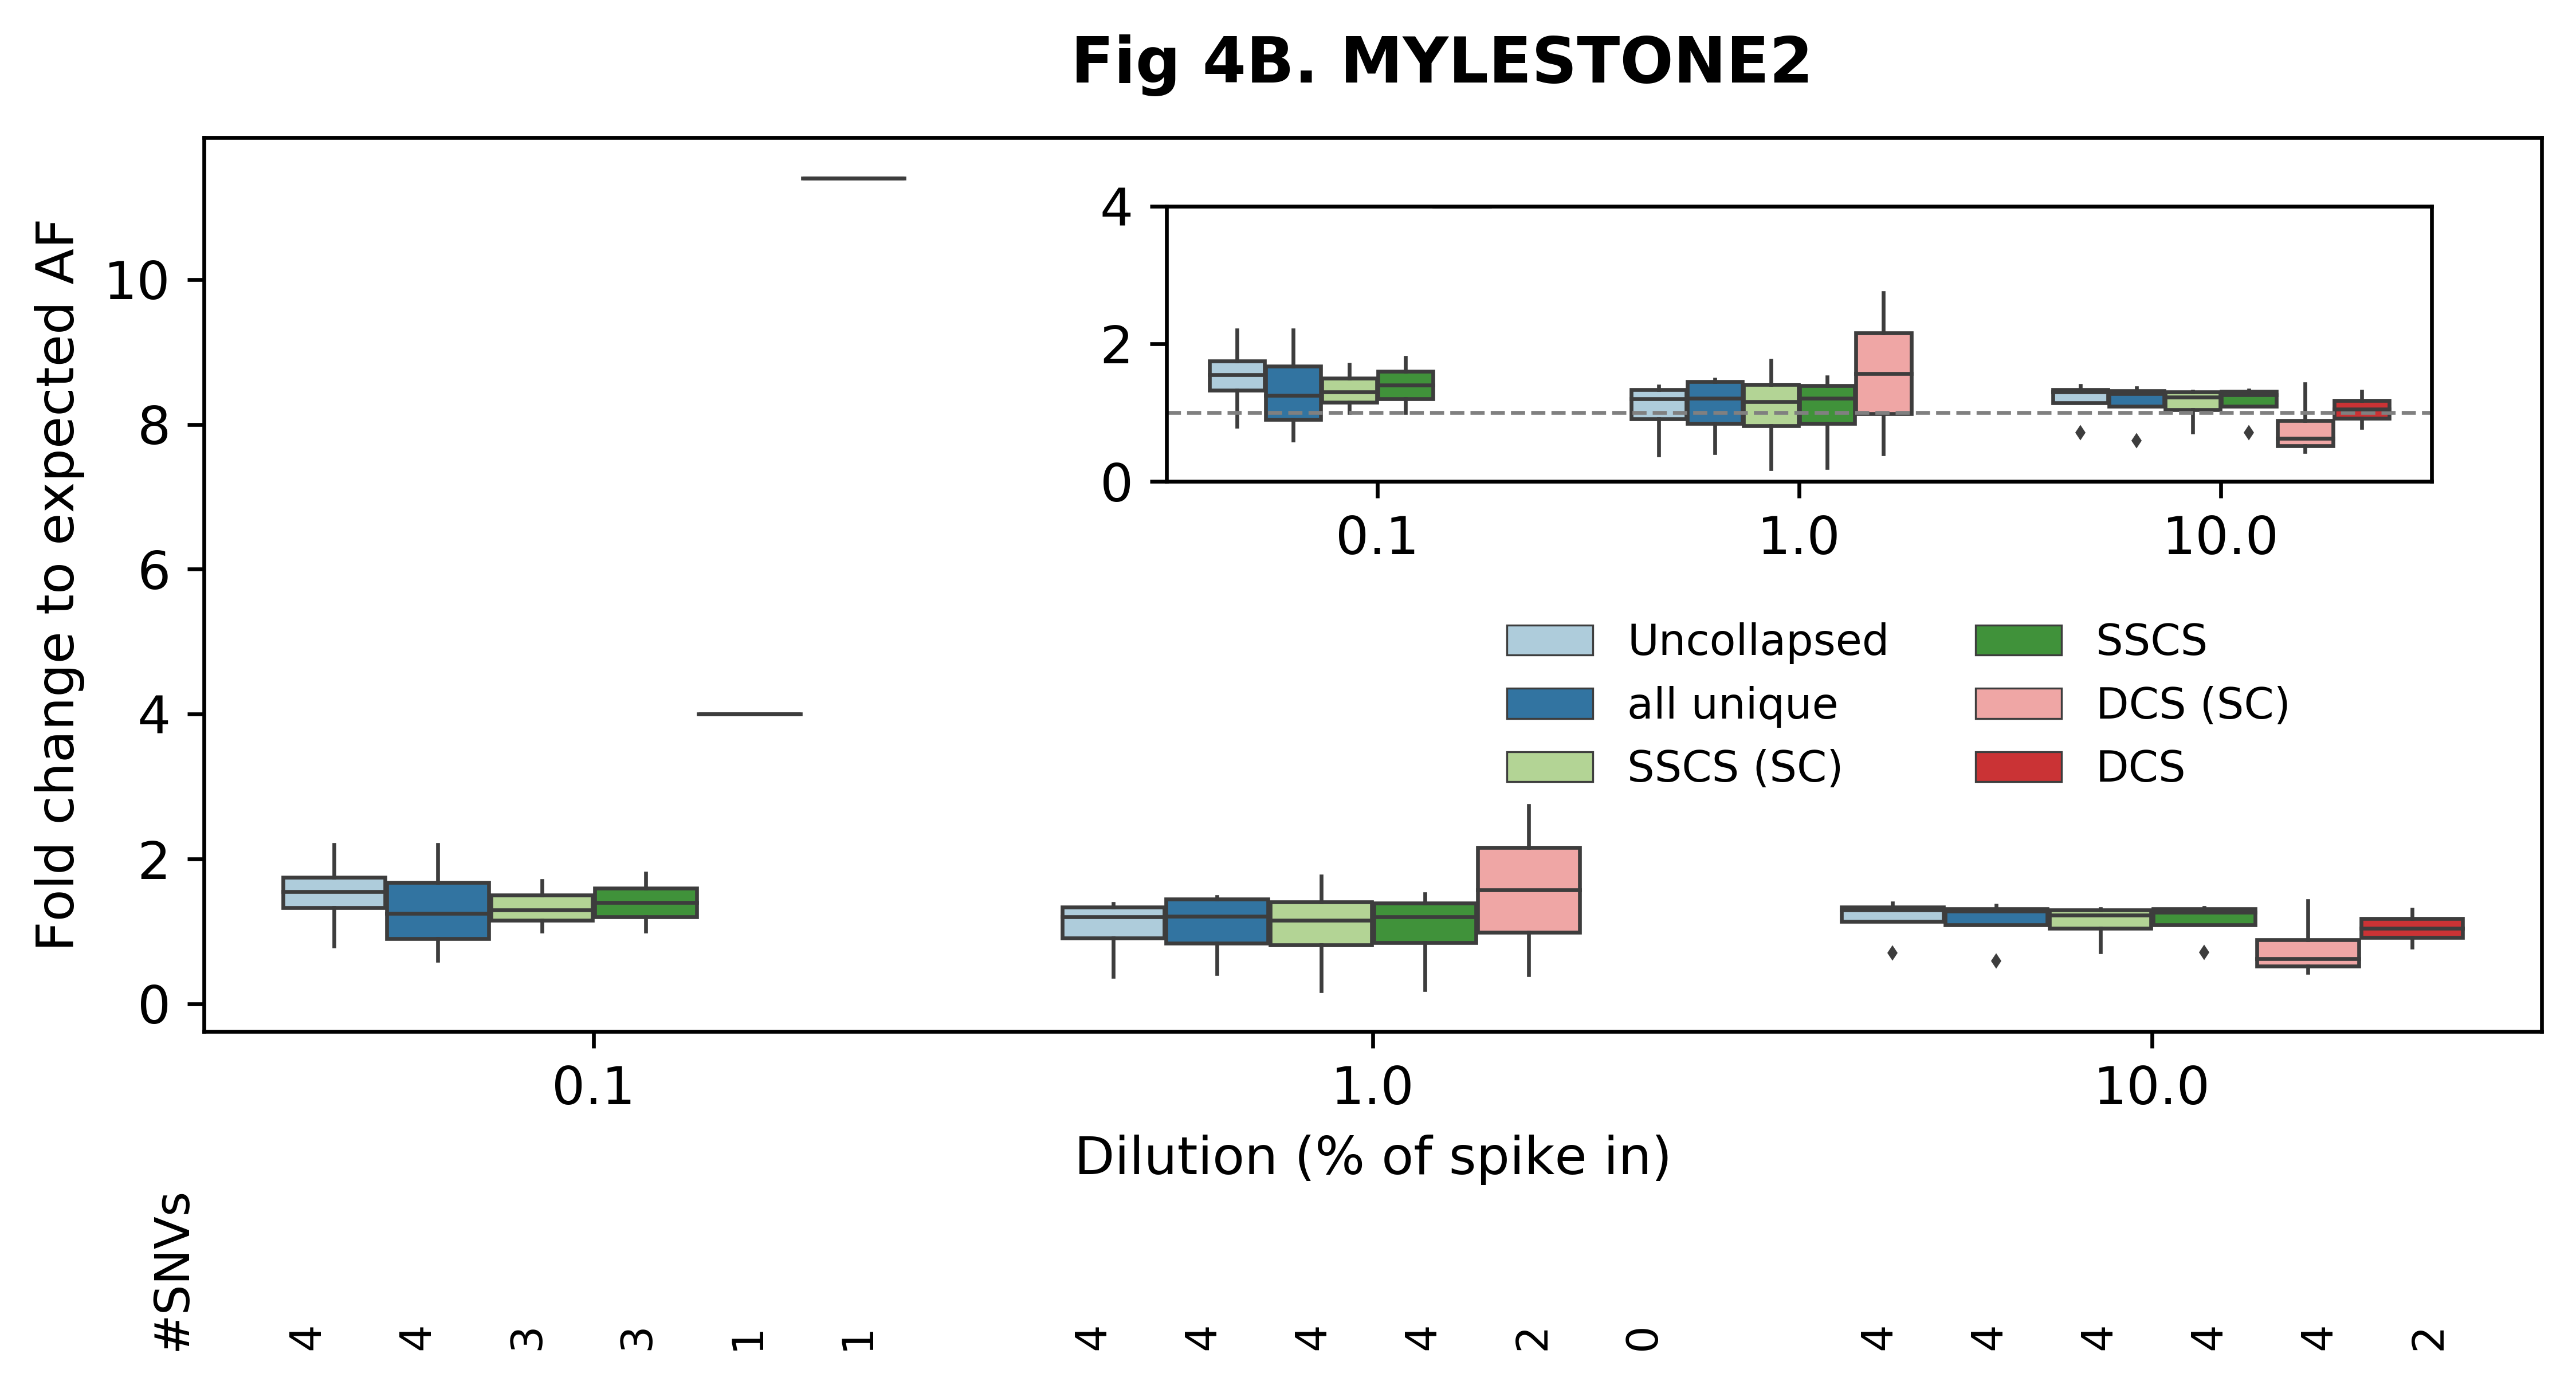

In [9]:
bamtypes = ['uncollapsed', 'all.unique.dcs', 'sscs.sc', 'sscs', 'dcs.sc', 'dcs']
    
value_type = "normalized_vaf"
legend_loc = (0.55, 0.25)
addplot = True
addplot_loc = [0.4, 0.72, 0.46, 0.16]

ylimit = [0, 3]
yhline = 1

pt_nSNV = 0.04 # For showing #SNV
pt_shift = 7
suptitle = 'Fig 4B. MYLESTONE2'
compare_VAF_boxplot(df, bamtypes, suptitle, value_type, legend_loc, addplot, 
                         addplot_loc, ylimit, yhline, pt_nSNV, pt_shift)



In [6]:
def compare_VAF_boxplot(df, bamtypes, suptitle, value_type, legend_loc, addplot, 
                         addplot_loc, ylimit, yhline, pt_nSNV=0.02, pt_shift=50):
    ### Parameter settings
    levels = df.level.unique()[::-1]
    
    ## Re-arrange bamtypes
    df_tmp = pd.DataFrame()
    for bamtype in bamtypes:
        df_tmp = pd.concat([df_tmp, df.loc[df.bamtype==bamtype, :]], sort=False)
    df_tmp.index = np.asarray(range(df_tmp.shape[0]))
    df = df_tmp.copy()
    
    ## Plot
    sns.set_palette("Paired")
    fig = plt.figure(figsize=(8, 5), dpi=600)
    plt.rcParams.update({'font.size': 11})
    ax = fig.add_subplot(111)
    
    # boxplot
    df = df.assign(level_float=[float(x.split("%")[0]) for x in df.level])
    sns.boxplot(x = 'level_float', y = value_type, hue = 'bamtype', linewidth=0.8, fliersize=1, showcaps=False, data = df, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Uncollapsed', 'all unique', 'SSCS (SC)', 'SSCS', 'DCS (SC)', 'DCS'],
                  bbox_to_anchor=legend_loc, loc='lower left',framealpha=0,
               ncol=2, borderaxespad=0., fontsize=9)    
    ax.set_ylabel('Fold change to expected AF')
    ax.set_xlabel('Dilution (% of spike in)')

    # Add #SNVs
    nvars = []
    for level in levels:
        for bamtype in bamtypes:
            nvars.append(sum((df.level == level) & (df.bamtype == bamtype)))
    y_loc = 0.22
    axis_start = 0.04
    fig.text(axis_start-0.01, y_loc, '#SNVs', rotation=90, fontsize=10)
    
    pt = pt_nSNV
    for i in range(len(nvars)):
        fig.text(axis_start+(i+1)*pt, y_loc, nvars[i], rotation=90, fontsize=9)
        if (i+1)%6==0:
            axis_start += pt+pt/pt_shift

    # Add subplot
    if addplot is True:
        plt.axes(addplot_loc) 
        sns.boxplot(x = 'level_float', y = value_type, hue = 'bamtype', linewidth=0.8, fliersize=1, showcaps=False, data = df)
        plt.axhline(yhline, ls='--', color='gray', linewidth = 0.8)
        plt.legend().set_visible(False)
        plt.ylim(ylimit)
        
        f = plt.gca()
        f.axes.yaxis.set_ticks([0, 2, 4])
        f.axes.yaxis.set_ticklabels([0, 2, 4])
        
        plt.ylabel("")
        plt.xlabel("")
        
    fig.suptitle(suptitle, fontweight="bold")
    fig.subplots_adjust(top=0.92, left=0.05, bottom=0.4)

 <a id='section.fig5'> Fig 5. Copy number calling and quantification on LargeMid </a>

In [10]:
os.chdir(data_dir)
df = pd.read_csv('Fig5_CN_profile.txt', sep='\t')
df.head(2)

,ID,chr,start,end,Bamtype,seg_mean_Manual,seg_mean_Auto,seg_mean_avg,Sample_num,Sample,dilution,seg_mean_expected,seg_mean_normalized_ratio
0,056_dedup,8,117859715,128750635,dedup,0.2304,0.2353,0.23285,56,56,100.0,1.132525,0.205602
1,056_dcs.sr,8,117859715,128750635,dcs.sr,0.9041,0.8612,0.88265,56,56,100.0,1.132525,0.779365


### Difference from expected logRatio

In [12]:
os.chdir(data_dir)
df = pd.read_csv('Fig5_CN_profile.txt', sep='\t')
df = df.assign(seg_mean_diff=df.seg_mean_avg-df.seg_mean_expected)
df.head(2)

,ID,chr,start,end,Bamtype,seg_mean_Manual,seg_mean_Auto,seg_mean_avg,Sample_num,Sample,dilution,seg_mean_expected,seg_mean_normalized_ratio,seg_mean_diff
0,056_dedup,8,117859715,128750635,dedup,0.2304,0.2353,0.23285,56,56,100.0,1.132525,0.205602,-0.899675
1,056_dcs.sr,8,117859715,128750635,dcs.sr,0.9041,0.8612,0.88265,56,56,100.0,1.132525,0.779365,-0.249875


Text(0, 0.5, 'Difference to expected LogRatio')

Text(0.5, 0, 'Dilution (% of spike in)')

(-0.55, 0.35)

Text(0.5, 0.98, 'Fig 5. LargeMid CNV')

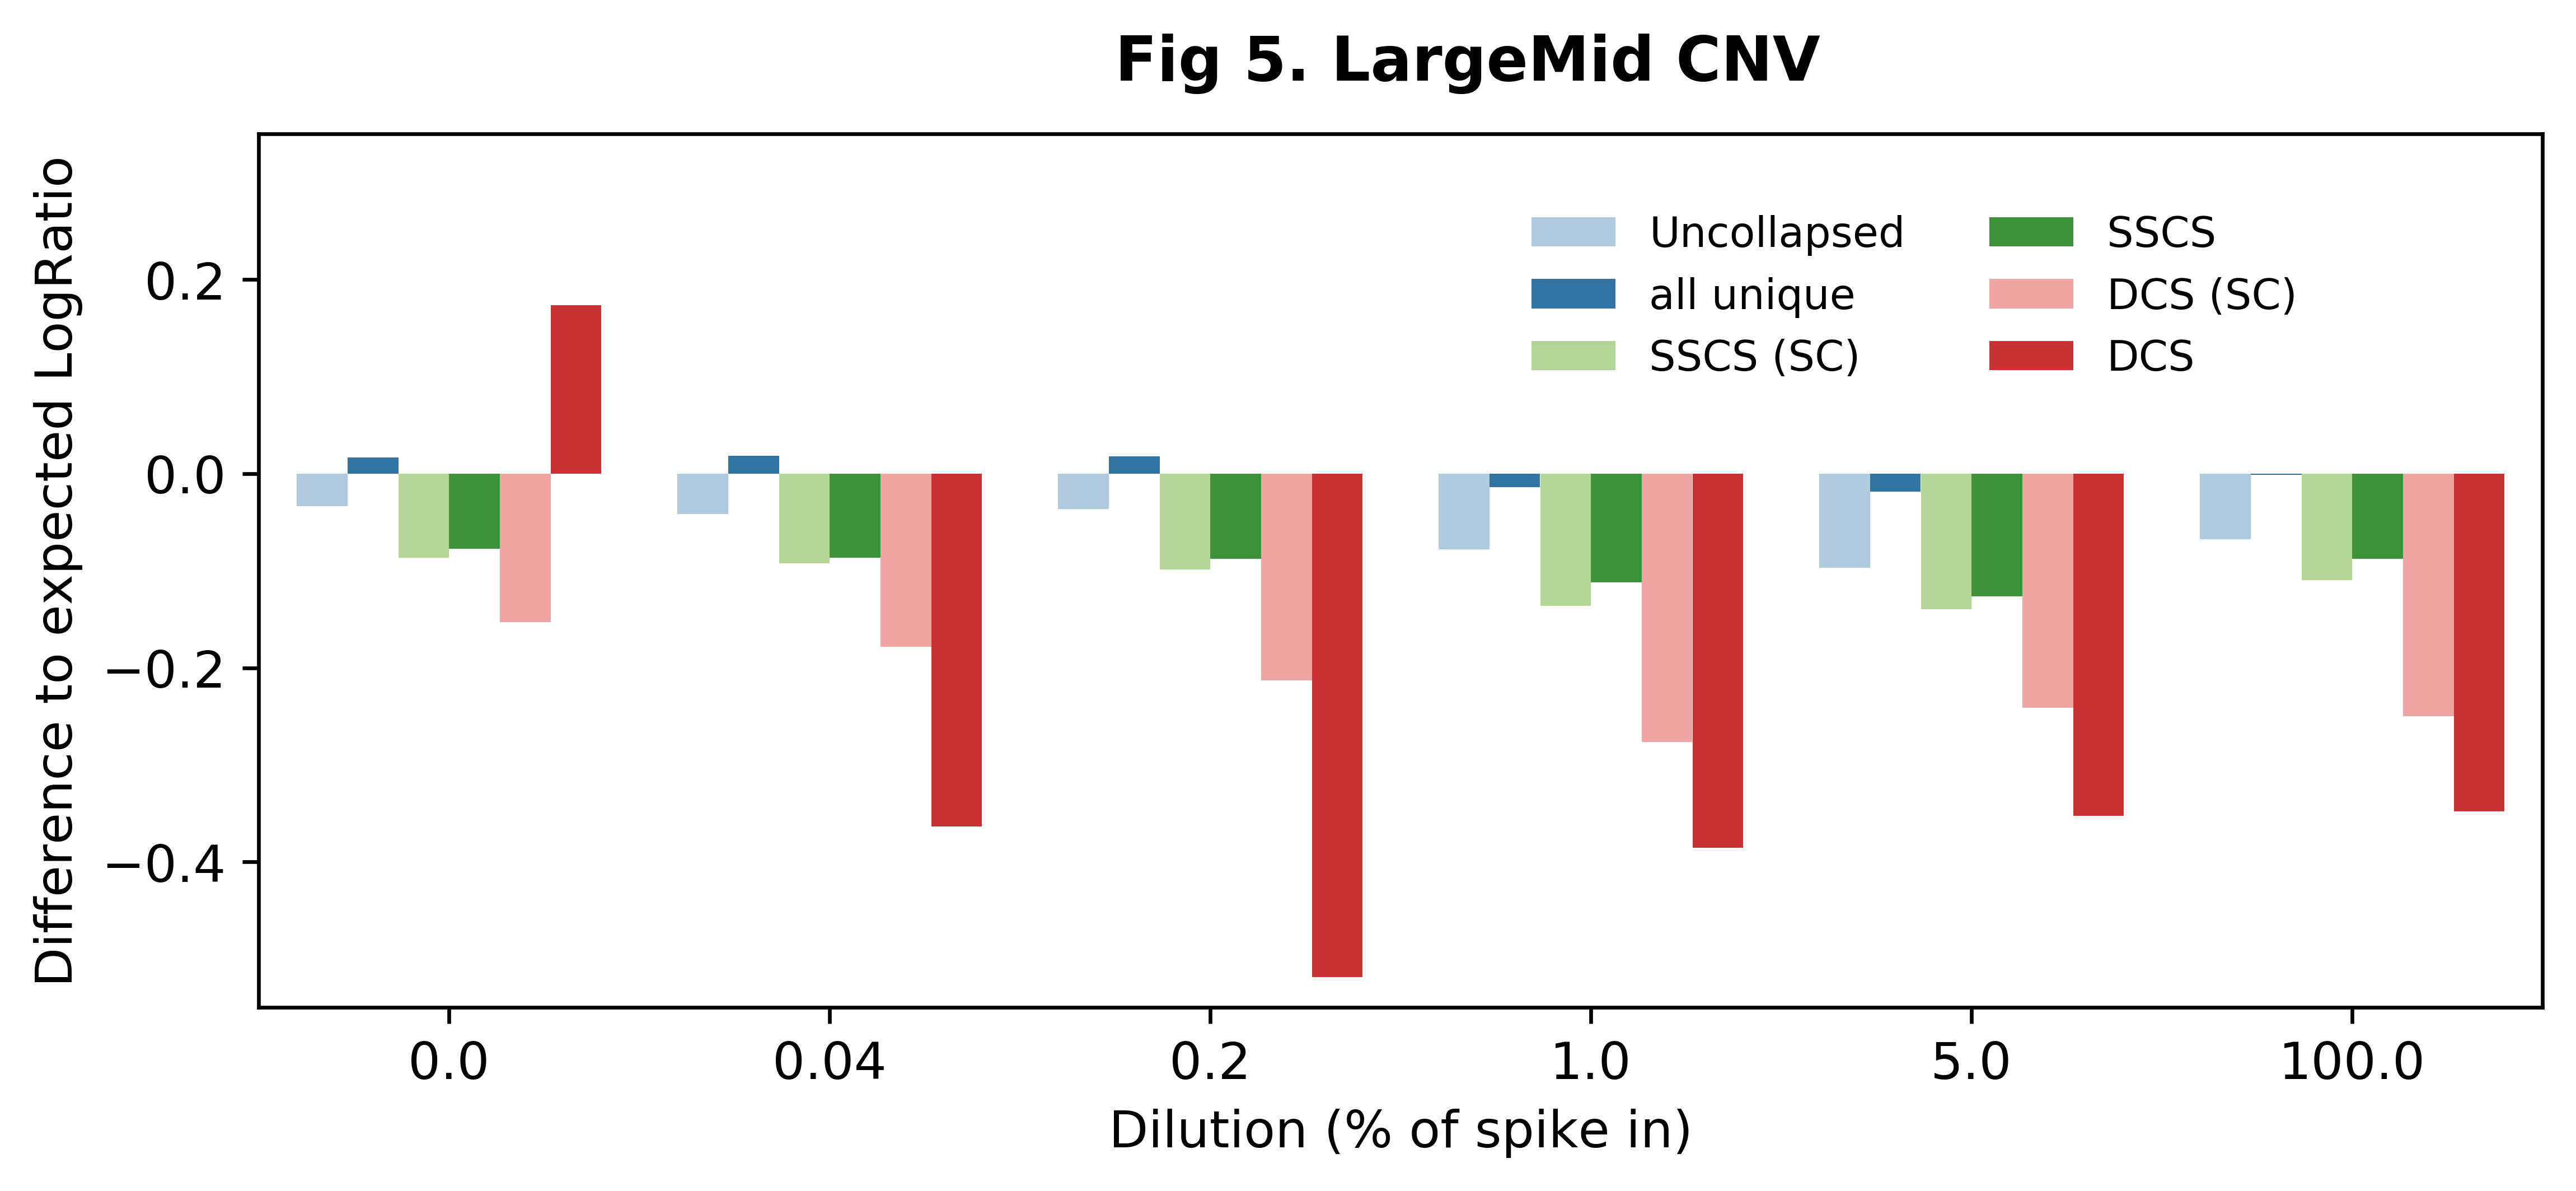

In [13]:
levels = ['0%', '0.04%', '0.2%', '1%', '5%', '100%']
bamtypes = ['uncollapsed', 'all.unique.dcs', 'sscs.sr', 'sscs', 'dcs.sr', 'dcs']

## Re-arrange bamtypes
df_tmp = pd.DataFrame()
for bamtype in bamtypes:
    df_tmp = pd.concat([df_tmp, df.loc[df.Bamtype==bamtype, :]], sort=False)
df_tmp.index = np.asarray(range(df_tmp.shape[0]))
df = df_tmp.copy()

## Parameter settings
title = "Fig 5. LargeMid CNV"
ylabel = "Difference to expected LogRatio"
legend_loc = (0.55, 0.7)
ylimit = [-0.55, 0.35]#[-13.5, 1.5]
yhline1 = 1

## Plot
sns.set_palette("Paired")
fig = plt.figure(figsize=(8, 5), dpi=600)
plt.rcParams.update({'font.size': 11})
ax = fig.add_subplot(111)

# barplot
sns.barplot(x = 'dilution', y = 'seg_mean_diff', hue = 'Bamtype', data = df, ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Uncollapsed', 'all unique', 'SSCS (SC)', 'SSCS', 'DCS (SC)', 'DCS'],
              bbox_to_anchor=legend_loc, framealpha=0,
           ncol=2, borderaxespad=0., fontsize=9) #loc='lower left',
ax.set_ylabel(ylabel)
ax.set_xlabel('Dilution (% of spike in)')
ax.set_ylim(ylimit)
# plt.axhline(yhline1, ls='--', color='gray', linewidth = 0.8)

fig.suptitle(title, fontweight="bold")
fig.subplots_adjust(top=0.92, left=0.05, bottom=0.4)

 <a id='section.fig6'> Fig 6. Copy number calling and quantification on HPV-SiHa </a>

In [14]:
## Load data
os.chdir(data_dir)
df = pd.read_csv('Fig6_HPV-SiHa_copies_profile.txt', sep='\t')
df.head(2)

## Load PCR data
os.chdir("/path/to/data")
ddpcr = pd.read_excel("tz_20170316_serial_dilution_SiHa_ddPCR.xlsx")

copies_true = np.mean(ddpcr.loc[ddpcr.level == "100% SiHa", ["HPV16-E6", "HPV16-E7"]], axis=1)
copies_true = copies_true.tolist()[0]
print(copies_true)

ddpcr = ddpcr.assign(avg = (ddpcr["HPV16-E6"]+ddpcr["HPV16-E7"])/2)
df_ddpcr = ddpcr.loc[:8, :]
df_ddpcr = df_ddpcr.assign(dilution = [float(x.split("%")[0]) for x in df_ddpcr.level])
df_ddpcr = df_ddpcr.assign(expected_copies_20ng = df_ddpcr.dilution /100 * copies_true)
df_ddpcr = df_ddpcr.assign(normalized_copies = df_ddpcr.avg/df_ddpcr.expected_copies_20ng)

## For plot
df_ddpcr2 = df_ddpcr.loc[:7, :]
df_ddpcr2.reset_index(inplace=True, drop=True)
df_ddpcr2.normalized_copies[pd.isna(df_ddpcr2.normalized_copies)] = 0

,type,Sample_Name,SiHa.DNA,observed_copies_20ng,expected_copies_20ng,normalized_copies
0,uncollapsed,SiHa-Cap1-1,3.0,364.180239,181.245,2.009326
1,uncollapsed,SiHa-Cap3-1,1.0,101.915913,60.415,1.686931


6041.5


/Users/jfzou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jfzou/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [24]:
## Comparing performances across bamtypes
for bamtype in df.type.unique():
    a = df.normalized_copies[(df.type==bamtype) & np.invert(df.Sample_Name.isin(["SiHa-Cap3-7","SiHa-Cap3-6"]))]
    print(bamtype, np.mean(a), np.std(a), np.percentile(a, 25), np.percentile(a, 75))

uncollapsed 1.4794121318095244 0.40328571432711785 1.2491067949836652 1.6991878336338793
all.unique.dcs 1.0160582192626573 0.1834464805350398 0.8725474922273708 1.155458063595521
sscs.sc 0.8284168922344679 0.22914909687855167 0.7035810399645728 0.9933048832645395
sscs 0.8407969141517451 0.23261674226553108 0.7061764426034205 1.0203955213321707
dcs.sc 0.8468812289071833 0.36387144866693083 0.6248534736620255 1.0727651935997968
dcs 0.8931767028367495 0.39822583002309414 0.6354927998327526 1.1182523706322176


In [29]:
## ddpcr
a = df_ddpcr2.normalized_copies[np.invert(df_ddpcr2.level.isin(["0.003% SiHa","0% SiHa"]))]
print('ddpcr', np.mean(a), np.std(a), np.percentile(a, 25), np.percentile(a, 75))

ddpcr 0.8505981774209864 0.102303480808444 0.8151949019283289 0.8938177604899445


(0.05, 250)

(0.05, 420)

Text(0.5, 0, 'Expected copies/20ng')

Text(0, 0.5, 'Observed copies/20ng')

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0.1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '100')]

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0.1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '100')]

(0.05, 250.0)

[Text(0, 1, ''),
 Text(0, 1, ''),
 Text(0, 1, ''),
 Text(0, 1, ''),
 Text(0, 1, ''),
 Text(0, 1, ''),
 Text(0, 1, ''),
 Text(0, 1, '')]

[Text(0, 1, '3.0'),
 Text(0, 1, '1.0'),
 Text(0, 1, '0.3'),
 Text(0, 1, '0.1'),
 Text(0, 1, '0.03'),
 Text(0, 1, '0.01'),
 Text(0, 1, '0.003'),
 Text(0, 1, '0.0')]

Text(0.5, 0, 'Dilution (% of spike in)')

Text(0, 0.5, 'Fold change to\n expected copies')

Text(0.5, 0, 'Dilution (% of spike in)')

(-0.05, 7.5)

(0, 2.5)

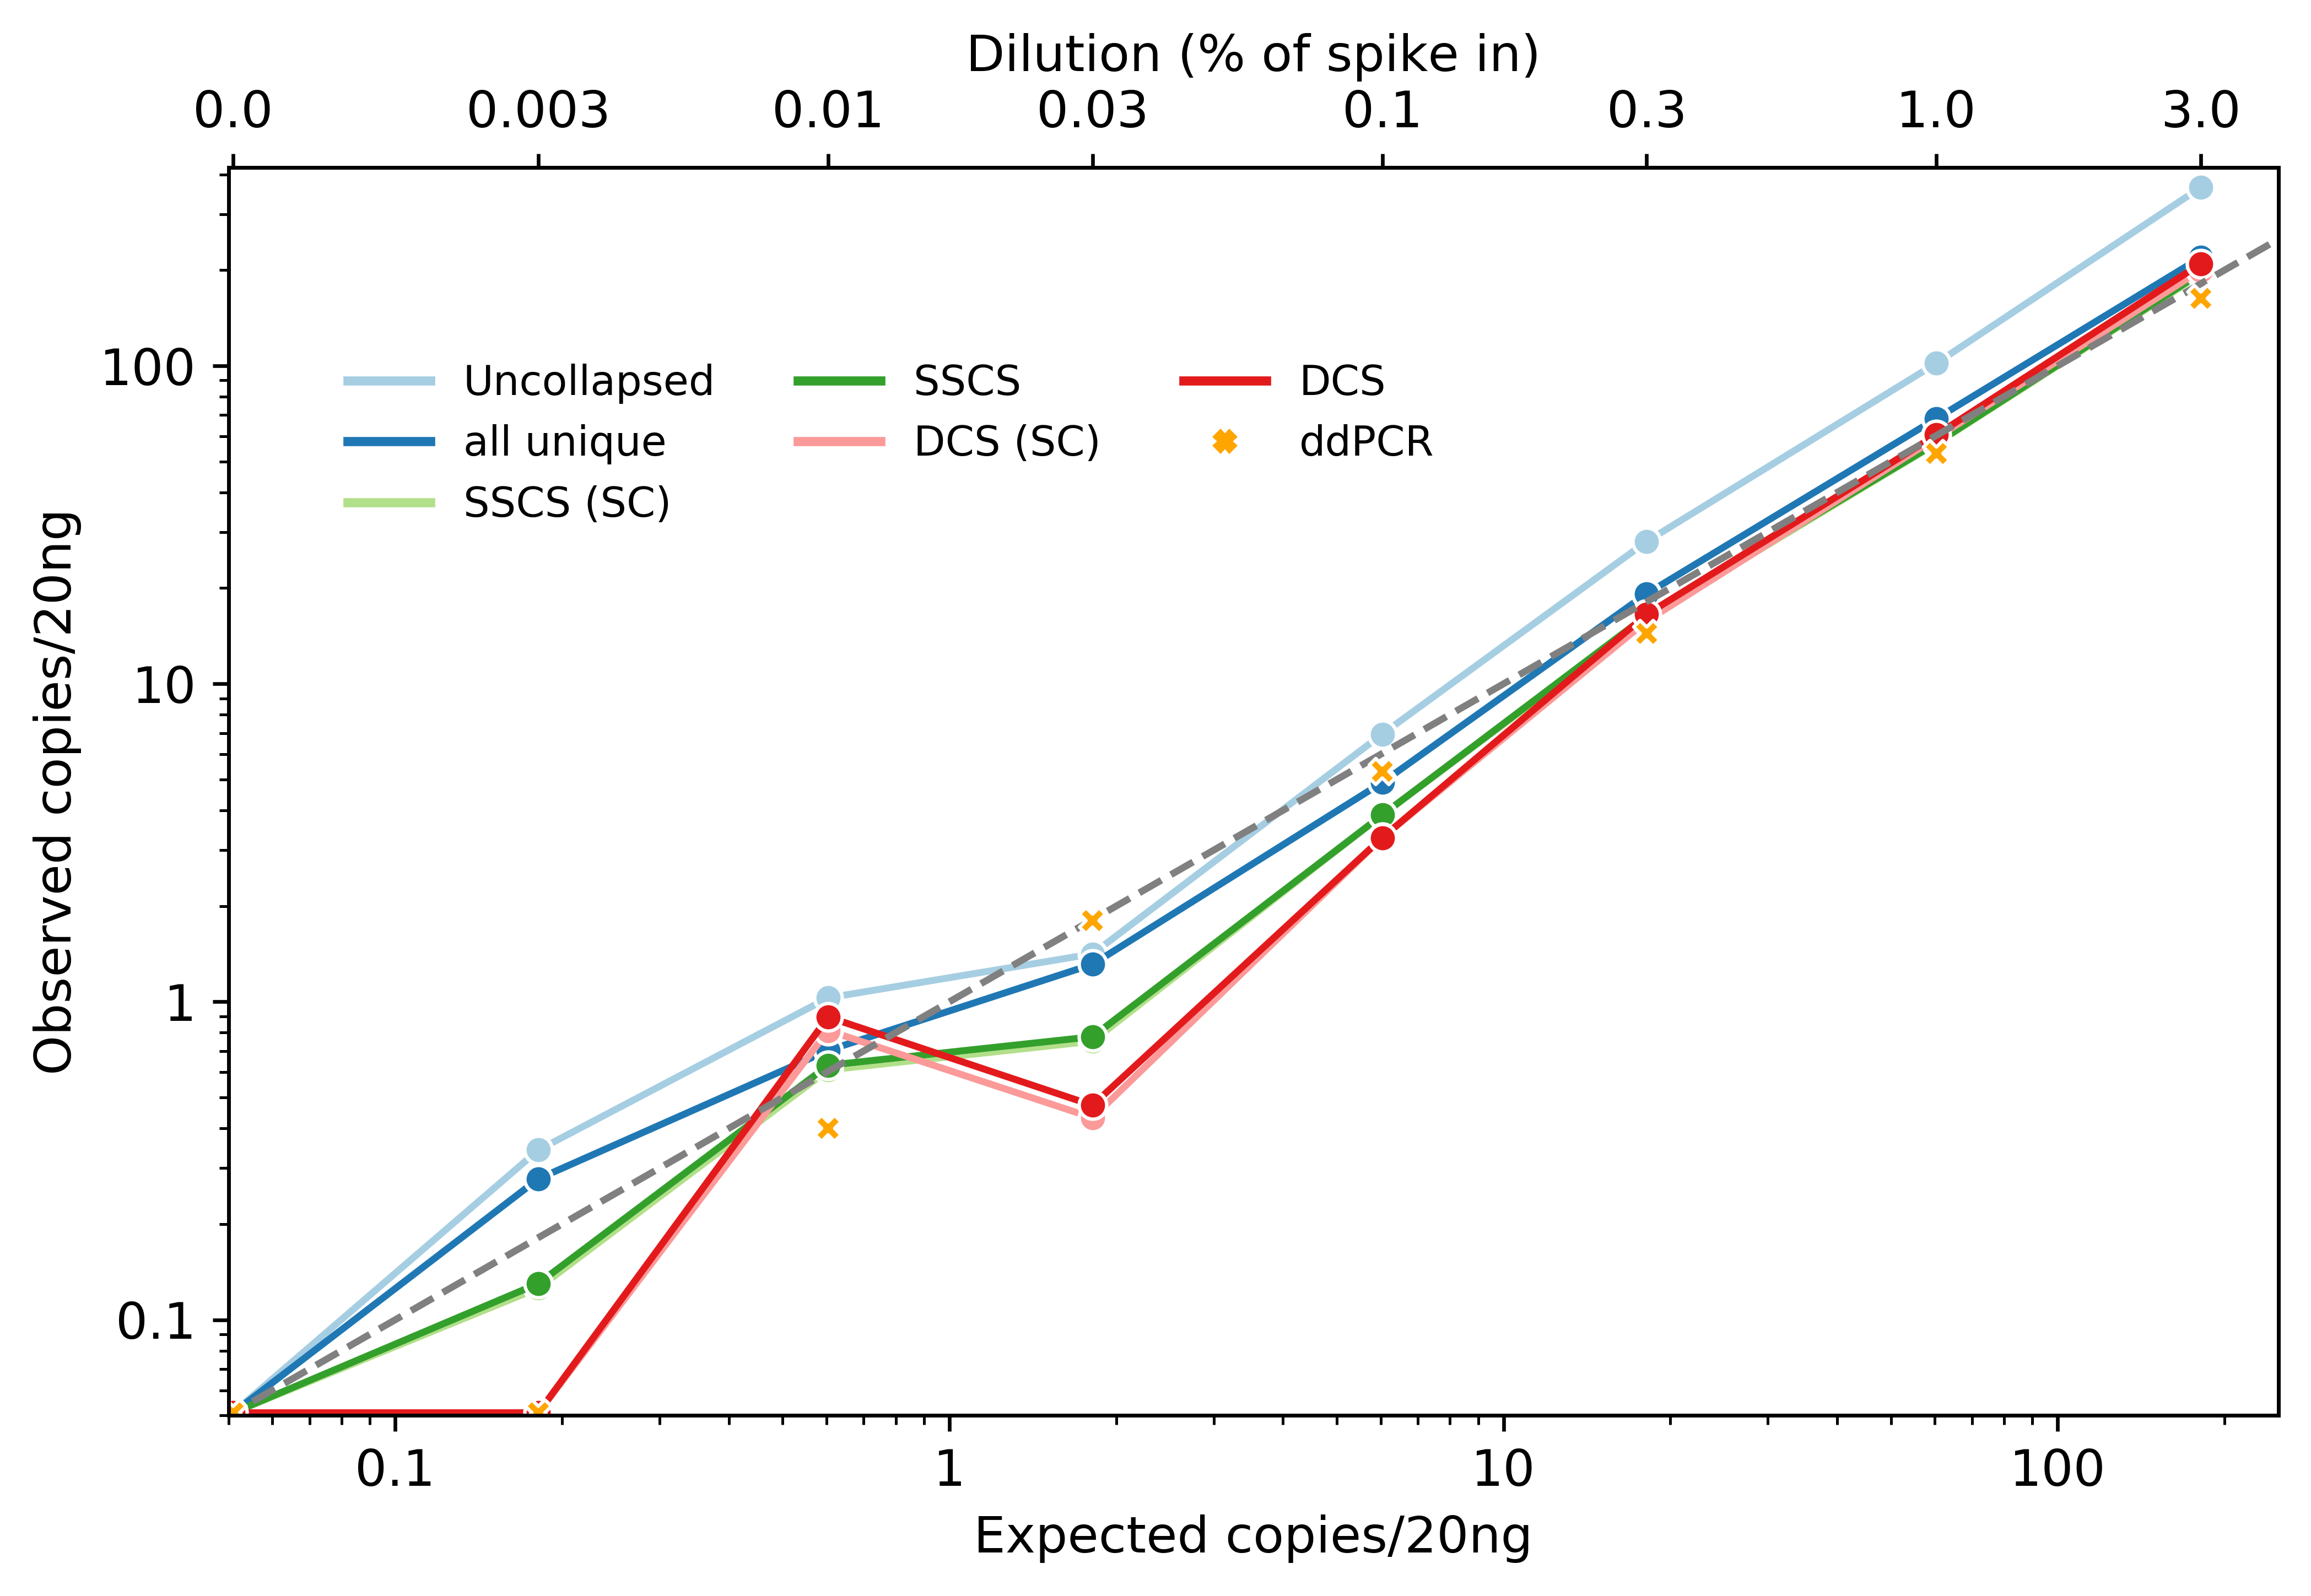

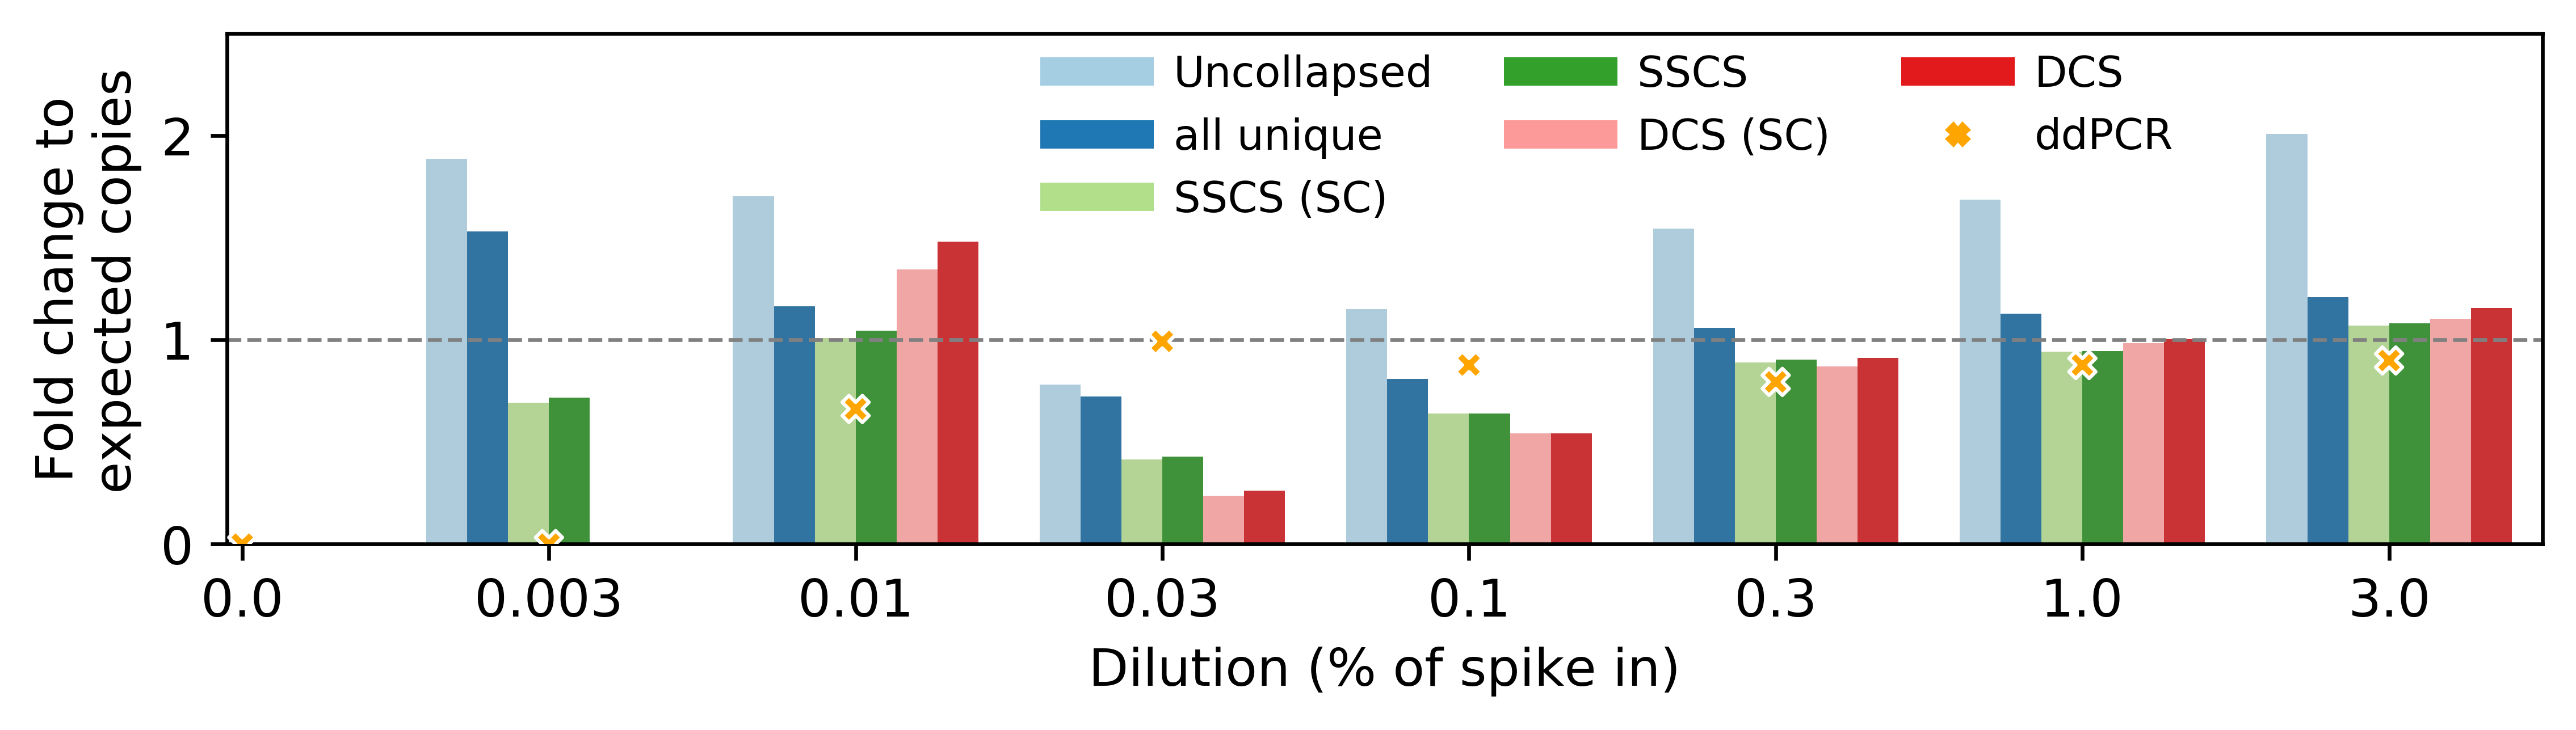

In [15]:
## Plot
title = "Fig 6. HPV-SiHa copies"

# using low value as 0
df = df.replace(0, 0.051)
df_ddpcr = df_ddpcr.replace(0, 0.051)
legend_loc = (0.05, 0.7)

fig = plt.figure(figsize=(8, 5), dpi=600)
ax1 = fig.add_subplot(111)

sns.set_palette("Paired")

## Fig A
sns.lineplot(x = 'expected_copies_20ng', y = 'observed_copies_20ng', hue='type', marker="o", data=df, ax=ax1)
sns.scatterplot(x = "expected_copies_20ng", y = "avg", style="source", markers=["X", "s", "d"], s = 2**5, color = "orange", 
                data = df_ddpcr, ax=ax1, zorder=10)

## Expected line
axlim = 250
aylim = 420

plt.plot([0, axlim], [0, axlim], '--', color = 'gray')

plt.xscale('log')
plt.yscale('log')
plt.xlim([0.05, axlim])
plt.ylim([0.05, aylim])
plt.xlabel('Expected copies/20ng')
plt.ylabel('Observed copies/20ng')
labels_0 = [0, 0, 0.1, 1, 10, 100]
ax1.set_xticklabels(labels_0)
ax1.set_yticklabels(labels_0)

labels_new = ['Uncollapsed', 'all unique', 'SSCS (SC)', 'SSCS', 'DCS (SC)', 'DCS', 'ddPCR']
legend = [Line2D([0], [0], color=sns.color_palette()[0], lw=2),
          Line2D([0], [0], color=sns.color_palette()[1], lw=2),
          Line2D([0], [0], color=sns.color_palette()[2], lw=2),
          Line2D([0], [0], color=sns.color_palette()[3], lw=2),
          Line2D([0], [0], color=sns.color_palette()[4], lw=2),
          Line2D([0], [0], color=sns.color_palette()[5], lw=2),
          Line2D([0], [0], marker='X', color="orange", markersize=4, linestyle='None')]
plt.legend(legend, labels_new, bbox_to_anchor=legend_loc, loc='lower left',framealpha=0,
           ncol=3, borderaxespad=0., fontsize=9)    #(0.55, 0.2)

## Add another x-axis

ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(axis='x', which='major', length=0)
ax2.tick_params(axis='x', which='minor', length=0)
ax2.set_xticklabels(ax2.get_xticklabels(), "")
ax2.set_xticks(df.expected_copies_20ng[:8])
ax2.set_xticklabels(df['SiHa.DNA'][:7].tolist() + [0.0])
ax2.tick_params(axis='x', which='major', length=3)
ax2.set_xlabel("Dilution (% of spike in)")

### Fig 6B
os.chdir(data_dir)
df = pd.read_csv('Fig6_HPV-SiHa_copies_profile.txt', sep='\t')

## Prepare data
bamtypes = ['uncollapsed', 'all.unique.dcs', 'sscs.sc', 'sscs', 'dcs.sc', 'dcs']
## Re-arrange bamtypes
df_tmp = pd.DataFrame()
for bamtype in bamtypes:
    df_tmp = pd.concat([df_tmp, df.loc[df.type==bamtype, :]], sort=False)
df_tmp.index = np.asarray(range(df_tmp.shape[0]))
df = df_tmp.copy()

fig = plt.figure(figsize=(8, 3), dpi=600)
ax2 = fig.add_subplot(111)
sns.set_palette("Paired")

ylabel = "Fold change to\n expected copies"
legend_loc = (0.35, 0.6)
ylimit = [0, 2.5]
yhline1 = 1

# barplot
sns.barplot(x = 'SiHa.DNA', y = 'normalized_copies', hue = 'type', data = df, ax=ax2)

xticks = plt.gca().get_xticks()
df_ddpcr2 = df_ddpcr2.assign(xticks = xticks[0:][::-1])

sns.scatterplot(x = "xticks", y = "normalized_copies", style = "source", markers=["X", 's', 'd'], 
                s = 2**5, color = "orange",
                data = df_ddpcr2, ax=ax2, zorder=10, legend="full")

labels_new = ['Uncollapsed', 'all unique', 'SSCS (SC)', 'SSCS', 'DCS (SC)', 'DCS', 'ddPCR']
legend = [Line2D([0], [0], color=sns.color_palette()[0], lw=6),
          Line2D([0], [0], color=sns.color_palette()[1], lw=6),
          Line2D([0], [0], color=sns.color_palette()[2], lw=6),
          Line2D([0], [0], color=sns.color_palette()[3], lw=6),
          Line2D([0], [0], color=sns.color_palette()[4], lw=6),
          Line2D([0], [0], color=sns.color_palette()[5], lw=6),
          Line2D([0], [0], marker='X', color="orange", markersize=4, linestyle='None')]
plt.legend(legend, labels_new, bbox_to_anchor=legend_loc, loc='lower left',framealpha=0,
           ncol=3, borderaxespad=0., fontsize=9)    #(0.55, 0.2)

plt.ylabel(f"{ylabel}")
plt.xlabel('Dilution (% of spike in)')
plt.xlim([-0.05, 7.5])
plt.ylim(ylimit)
# plt.yticks(ticks=[0, 1, 2])
plt.axhline(yhline1, ls='--', color='gray', linewidth = 0.8)

# fig.suptitle(title, fontweight="bold")
fig.subplots_adjust(top=0.9, left=0.05, bottom=0.4)

 <a id='section.fig7b'> Fig 7B. Structural variation calling and quantification on MYLESTONE2 </a>

In [19]:
os.chdir(data_dir)
df = pd.read_csv('Fig8_KMS11_translocation_profile.txt', sep='\t')
df.head(2)

,Sample_bamtype,depthTarget,depthProbes,depthTranslTarget,bamtype,Sample,dilution_evaluated,Dilution_level,level,normalized_dilution
0,KMS11-1.all.unique.dcs,754.5,6117.03000,525.507,all.unique.dcs,KMS11-1,8.590885,0.1,10.0,0.915671
1,KMS11-1.dcs,0.0,2.78189,0.000,dcs,KMS11-1,0.000000,0.1,10.0,0.000000


In [20]:
## Re-arrange bamtypes
bamtypes = ['uncollapsed', 'all.unique.dcs', 'sscs.sc', 'sscs', 'dcs.sc', 'dcs']
df_tmp = pd.DataFrame()
for bamtype in bamtypes:
    df_tmp = pd.concat([df_tmp, df.loc[df.bamtype==bamtype, :]], sort=False)
df_tmp.index = np.asarray(range(df_tmp.shape[0]))
df = df_tmp.copy()

df = df.assign(level_float=[float(x*100) for x in df.Dilution_level])


Text(0, 0.5, 'Fold change to\n expected proportion')

Text(0.5, 0, 'Dilution (% of spike in)')

(0, 2.4)

Text(0.5, 0.98, 'Fig 7B. KMS11 translocation')

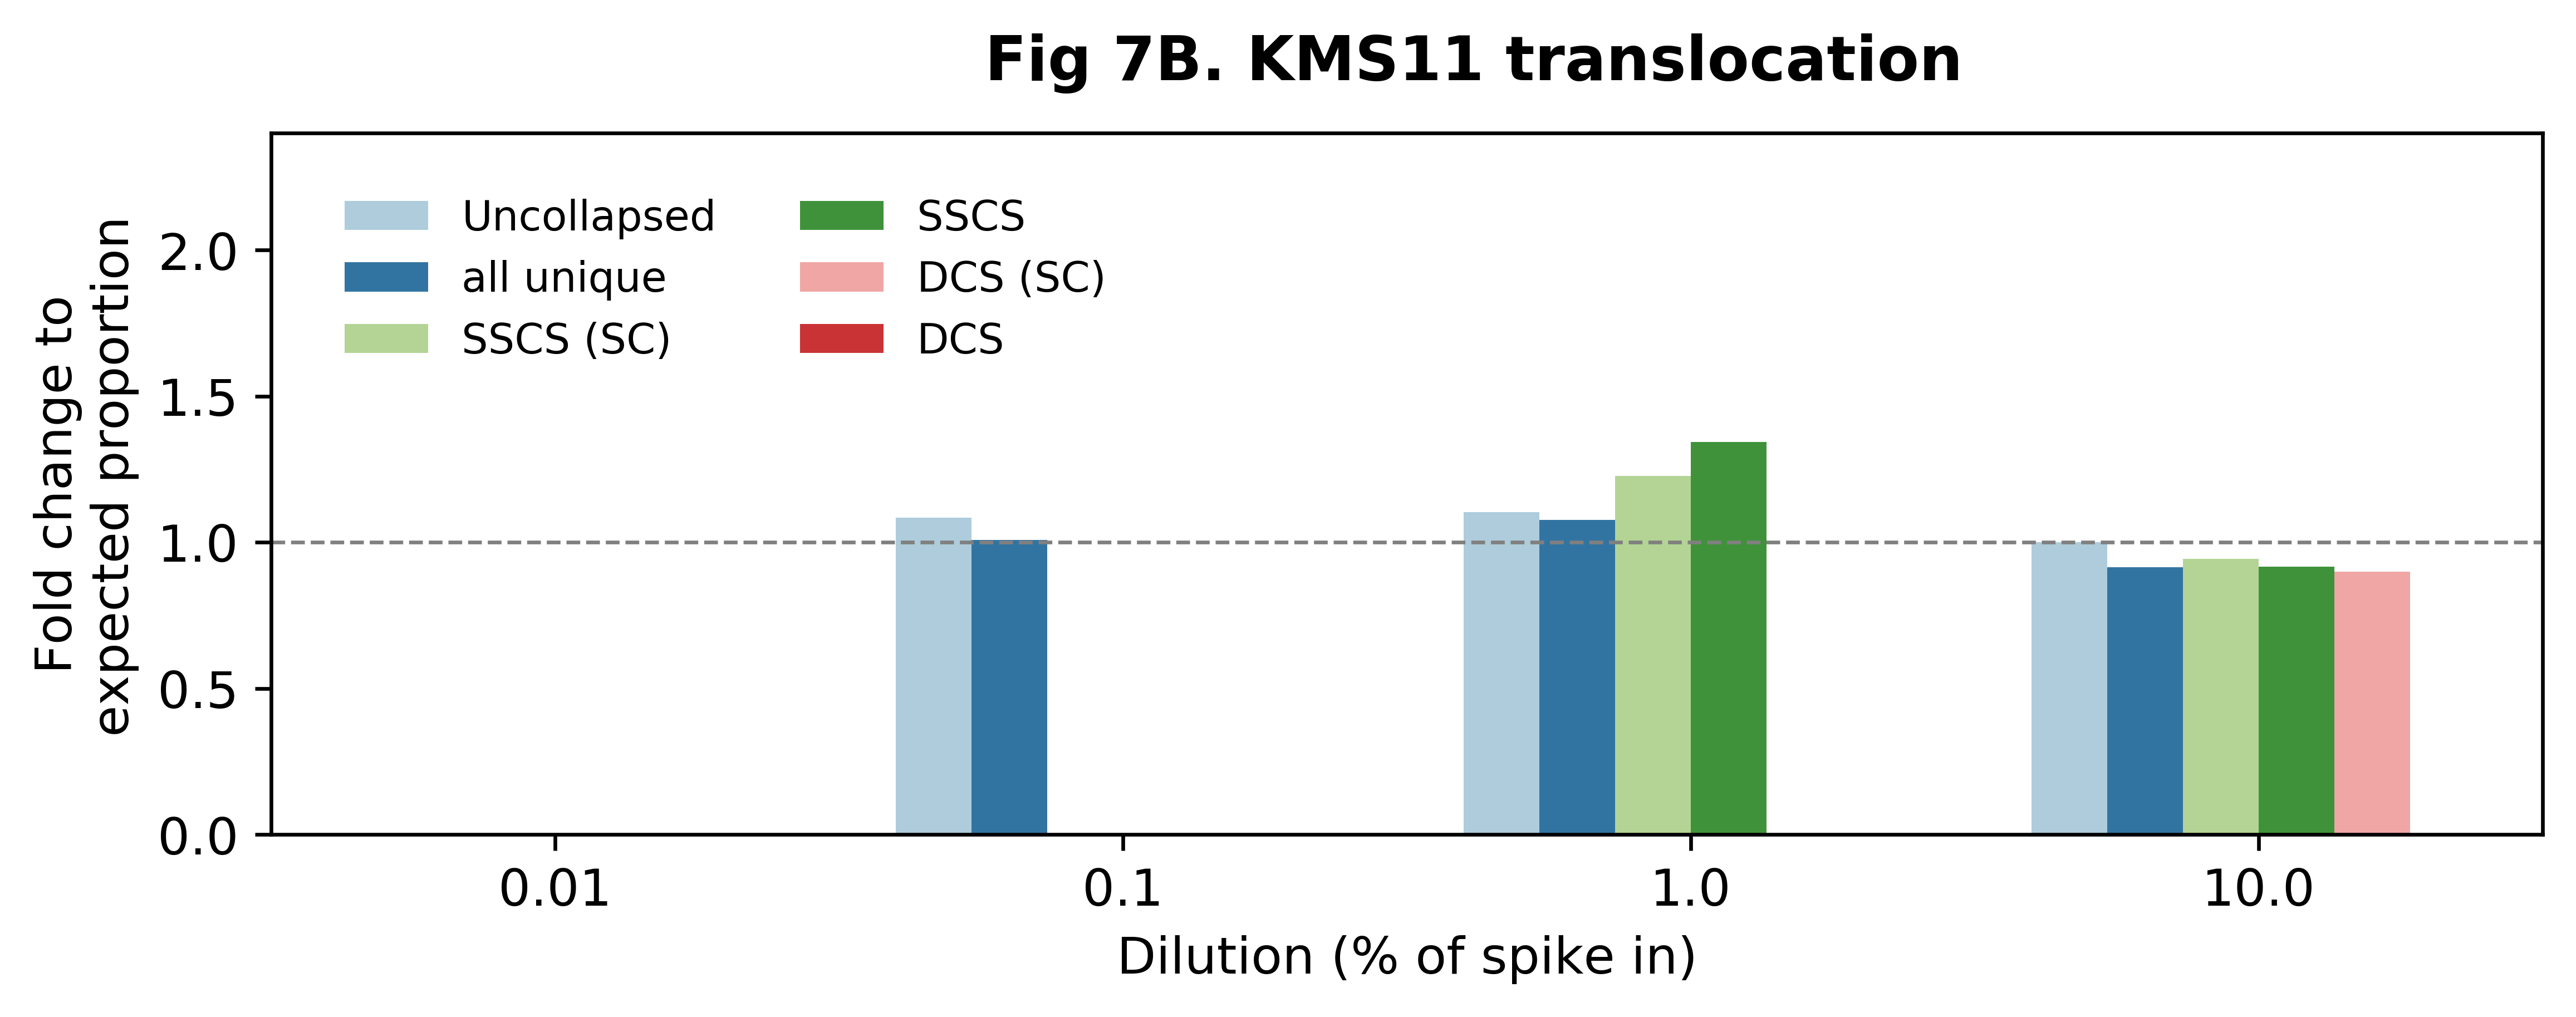

In [21]:
## Parameter settings
title = "Fig 7B. KMS11 translocation"
ylabel = "Fold change to\n expected proportion"
legend_loc = (0.025, 0.65)

### Plot
sns.set_palette("Paired")
fig = plt.figure(figsize=(8, 5), dpi=600)
plt.rcParams.update({'font.size': 11})

ax = fig.add_subplot(111)

# barplot
sns.barplot(x = 'level_float', y = 'normalized_dilution', hue = 'bamtype', data = df, ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Uncollapsed', 'all unique', 'SSCS (SC)', 'SSCS', 'DCS (SC)', 'DCS'],
              bbox_to_anchor=legend_loc, loc='lower left',framealpha=0,
           ncol=2, borderaxespad=0., fontsize=9)    #(0.55, 0.2)
ax.set_ylabel(ylabel)
ax.set_xlabel('Dilution (% of spike in)')
ax.axhline(1, ls='--', color='gray', linewidth = 0.8)
ax.set_ylim([0, 2.4])
    
fig.suptitle(title, fontweight="bold")
fig.subplots_adjust(top=0.92, left=0.05, bottom=0.5)



 <a id='section.fig5a'> Fig 5A. Segment value distribution for MOLM13 and SW48 </a>

In [100]:
%load_ext rpy2.ipython

/Users/jfzou/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [ ]:
%%R

library("copynumber")

## Logratio plot on overlapped panel between CCLE and CAPP-Seq
setwd(data_dir)
seg.file <- 'S2_Fig_CCLE_MOLM13-SW48_overlapped_panel.seg'
data <- read.csv(seg.file, sep="\t", stringsAsFactors = FALSE)
colnames(data) <- c('ID', 'chr', 'start', 'end', 'num.probes', 'segment.mean')

## Format
data$Chrom <- sapply(data$chr, function(x) if(x=="X") return(23) else if (x=="Y") return(24) else return(as.integer(x)))
data$ID[data$ID=="MOLM-13"] <- 'MOLM13'
data$ID[data$ID=="SW 48"] <- 'SW48'

## Plot    
cell.lines <- unique(data$ID)
for(cell in cell.lines){
  data.cell <- data[data$ID==cell,]
  
  ## Tranform 
  data.cell$segment.mean <- log2(data.cell$segment.mean)
  
  data.samp = data.frame(Chrom=data.cell$Chrom, Median.bp=(data.cell$start+data.cell$end)/2,
                         seg.mean=data.cell$segment.mean)
  colnames(data.samp)[3] <- data.cell$ID[1]
  
  data.wins <- winsorize(data=data.samp,verbose=FALSE)
  single.seg <- pcf(data=data.wins,gamma=12, Y=data.samp, verbose=FALSE)
  plotGenome(data=data.wins,segments=single.seg,sample=1,cex=3)
}

